# **This program predicts closing price of stocks.**

# **This is the program for prediction the closing price for heromotocorp**

**Supervised Learning,
Regression task, Batch learning**


In [1]:
!pip install quandl

In [0]:
import math
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#using scikit
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR  #support vector regressor 
from sklearn.model_selection  import train_test_split

In [3]:
dataframe=quandl.get("BSE/BOM500182", authtoken="K96houAiHzzdXMREh5EZ")

#for further usage we also have given link for asian paints stock you could also check this :

#dataframe=quandl.get("BSE/BOM500820", authtoken="K96houAiHzzdXMREh5EZ") -- this is for asian paints
print(dataframe.head())
print(dataframe.tail())

             Open   High  ...  Spread H-L  Spread C-O
Date                      ...                        
1992-03-02  190.0  210.0  ...        30.0        20.0
1992-03-03  205.0  210.0  ...        15.0        -5.0
1992-03-09  210.0  225.0  ...        15.0        15.0
1992-03-10  215.0  230.0  ...        20.0         5.0
1992-03-11  205.0  220.0  ...        15.0        10.0

[5 rows x 12 columns]
              Open     High  ...  Spread H-L  Spread C-O
Date                         ...                        
2020-03-25  1618.0  1682.95  ...      156.10       52.15
2020-03-26  1690.0  1836.00  ...      189.85      115.30
2020-03-27  1810.0  1836.45  ...      181.45     -149.85
2020-03-30  1655.0  1655.00  ...      113.55     -103.20
2020-03-31  1600.0  1633.45  ...       69.45       -5.80

[5 rows x 12 columns]


In [4]:
print('No of rows, No of columns are:',end="")
print(dataframe.shape)

No of rows, No of columns are:(5992, 12)


In [5]:
print(dataframe.dtypes)
#these are my independent variables

Open                         float64
High                         float64
Low                          float64
Close                        float64
WAP                          float64
No. of Shares                float64
No. of Trades                float64
Total Turnover               float64
Deliverable Quantity         float64
% Deli. Qty to Traded Qty    float64
Spread H-L                   float64
Spread C-O                   float64
dtype: object


In [6]:
#complete information of my dataset is:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5992 entries, 1992-03-02 to 2020-03-31
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5992 non-null   float64
 1   High                       5992 non-null   float64
 2   Low                        5992 non-null   float64
 3   Close                      5992 non-null   float64
 4   WAP                        5992 non-null   float64
 5   No. of Shares              5992 non-null   float64
 6   No. of Trades              5992 non-null   float64
 7   Total Turnover             5992 non-null   float64
 8   Deliverable Quantity       4500 non-null   float64
 9   % Deli. Qty to Traded Qty  4500 non-null   float64
 10  Spread H-L                 5992 non-null   float64
 11  Spread C-O                 5992 non-null   float64
dtypes: float64(12)
memory usage: 608.6 KB


In [7]:
dataframe.describe()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5.992000e+03,5992.000000,5.992000e+03,4.500000e+03,4500.000000,5992.000000,5992.000000
mean,1442.197447,1461.209671,1420.752762,1440.131392,1439.481266,7.791060e+04,1972.229473,7.691987e+07,4.354346e+04,37.578342,40.456909,-2.066055
std,1048.776788,1058.185616,1036.523176,1046.204353,1048.597546,1.376763e+05,2467.898531,1.906369e+08,9.691639e+04,19.797344,34.924114,32.136014
min,123.000000,123.950000,116.000000,116.800000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.230000e+02,0.820000,0.000000,-405.400000
25%,577.000000,587.250000,569.375000,577.487500,576.786044,1.561900e+04,651.000000,2.096299e+07,5.250250e+03,22.610000,15.687500,-13.850000
50%,975.500000,990.000000,955.325000,974.875000,972.106846,3.297900e+04,1467.000000,4.542725e+07,1.239300e+04,33.100000,32.275000,-1.200000
75%,2138.250000,2170.850000,2110.937500,2141.000000,2144.843686,7.939875e+04,2529.000000,8.663111e+07,4.347775e+04,48.520000,55.000000,9.800000
max,4200.000000,4200.000000,3996.550000,4047.300000,4051.620000,3.085587e+06,80793.000000,8.138679e+09,2.427734e+06,100.000000,483.150000,346.750000


In [8]:
print(dataframe['Deliverable Quantity'])

Date
1992-03-02        NaN
1992-03-03        NaN
1992-03-09        NaN
1992-03-10        NaN
1992-03-11        NaN
               ...   
2020-03-25     5885.0
2020-03-26     6103.0
2020-03-27    22738.0
2020-03-30    10197.0
2020-03-31     4934.0
Name: Deliverable Quantity, Length: 5992, dtype: float64


In [9]:
#dealing with null values in %  Deli. Qty to Traded Qty and Deliverable Quantity 
#1.remove data points which contain null
aoption=dataframe.dropna(subset=["% Deli. Qty to Traded Qty"],inplace=True)
dataframe.shape

(4500, 12)

In [0]:
%matplotlib inline

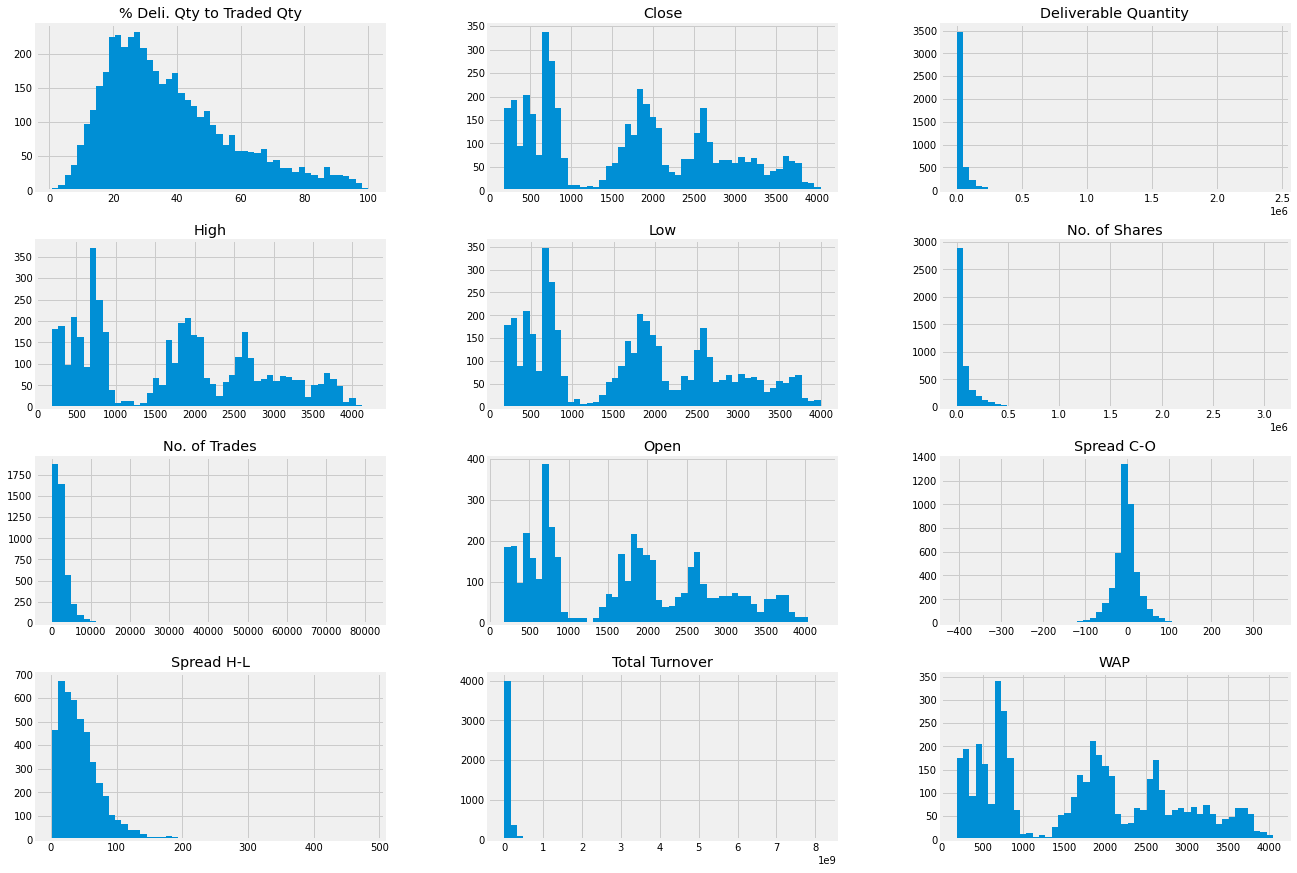

In [11]:
dataframe.hist(bins=50,figsize=(20,15))
plt.show()

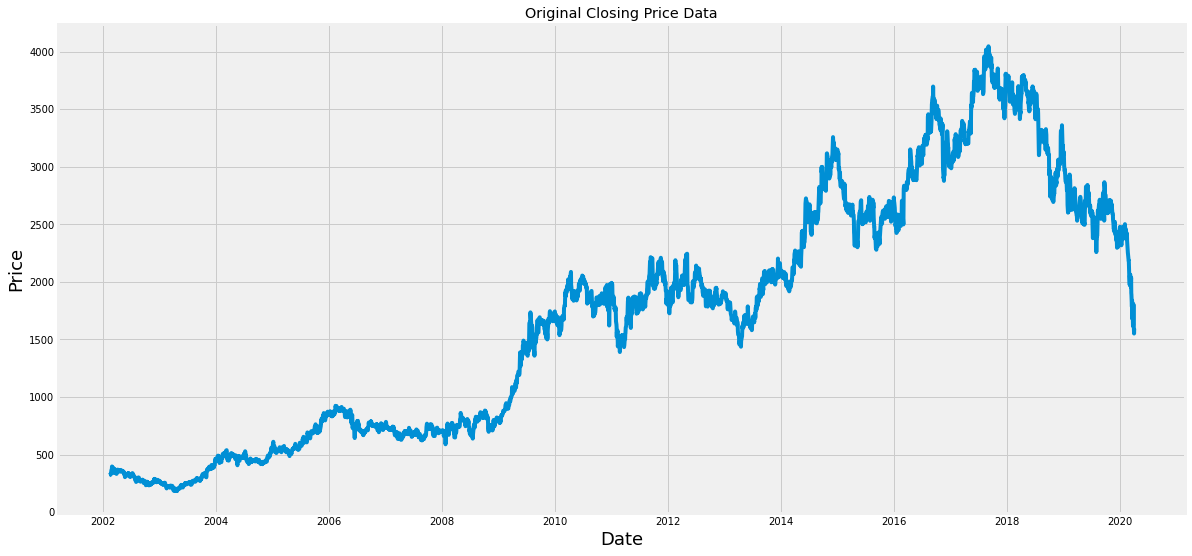

In [12]:
#lets visualize our closing price

plt.figure(figsize=(18,9))
plt.title('Original Closing Price Data')
plt.plot(dataframe['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [13]:
df1=dataframe
print(df1)

              Open     High  ...  Spread H-L  Spread C-O
Date                         ...                        
2002-02-08   311.8   325.70  ...       15.70        7.70
2002-02-15   313.8   326.00  ...       12.20        9.75
2002-02-18   329.0   339.00  ...       16.90        5.70
2002-02-19   329.0   337.50  ...        8.50        2.25
2002-02-20   327.0   342.00  ...       17.60       10.75
...            ...      ...  ...         ...         ...
2020-03-25  1618.0  1682.95  ...      156.10       52.15
2020-03-26  1690.0  1836.00  ...      189.85      115.30
2020-03-27  1810.0  1836.45  ...      181.45     -149.85
2020-03-30  1655.0  1655.00  ...      113.55     -103.20
2020-03-31  1600.0  1633.45  ...       69.45       -5.80

[4500 rows x 12 columns]


In [14]:
dataframe=dataframe[['Close']]#getting the close price,,close is our independent variable
print(dataframe.head())
print(dataframe.tail())

             Close
Date              
2002-02-08  319.50
2002-02-15  323.55
2002-02-18  334.70
2002-02-19  331.25
2002-02-20  337.75
              Close
Date               
2020-03-25  1670.15
2020-03-26  1805.30
2020-03-27  1660.15
2020-03-30  1551.80
2020-03-31  1594.20


In [15]:
# give here the predicting variable for how many days u want to find
n=int(input("enter here for how many days u want to predict : "))
forcasting=n


enter here for how many days u want to predict : 360


In [16]:
#creating another variable(prediction which will be used for predicting) it is dependent variable , in this we shifted n units up
dataframe["Prediction"]=dataframe[["Close"]].shift(-forcasting) #write inplace of -1 where for the no of days u want to predict
print(dataframe.head())
print(dataframe.tail())

             Close  Prediction
Date                          
2002-02-08  319.50      265.80
2002-02-15  323.55      272.15
2002-02-18  334.70      270.55
2002-02-19  331.25      268.65
2002-02-20  337.75      268.30
              Close  Prediction
Date                           
2020-03-25  1670.15         NaN
2020-03-26  1805.30         NaN
2020-03-27  1660.15         NaN
2020-03-30  1551.80         NaN
2020-03-31  1594.20         NaN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
#now creating the independent dataset(X)
#convert the dataframe into numpy array
#as we want only independent variables so we are dropping prediction as it was dependent
X=np.array(dataframe.drop(['Prediction'],1))
#remove the last 'n' row i.e. forcasting value
X=X[:-forcasting]#we removed the data which is to be forecast(predicted)
print(X)#this is a list of list

[[ 319.5 ]
 [ 323.55]
 [ 334.7 ]
 ...
 [2866.75]
 [2892.75]
 [2883.3 ]]


In [18]:
#now creating the dependent variable dataset which also contains null values(i.e. nan's)
Y=np.array(dataframe['Prediction'])
#in y also i am getting all values except last values which is to be predicted
Y=Y[:-forcasting]
print(Y)#this is a list # i think here we have started training our data with previous values

[ 265.8   272.15  270.55 ... 1660.15 1551.8  1594.2 ]


In [0]:
#now as usual we are putting 80% data to training and 20% to testing
#reference here is sklearn documentation
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


In [20]:
#as it is a regression type of problem so 
#we are using support vector machine(regressor) to train our model 
svr_rbf= SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_rbf.fit(x_train,y_train) 

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
#testing our model
#the best possible score our model can give is 1.0
#score returns the coefficient of determination R^2 of the prediction
svm_confidence=svr_rbf.score(x_test,y_test)
print("your score is :",svm_confidence)
#if ur score is near .9 means it is a great model

your score is : 0.7886879921953768


# **It seems a great score, means we trained our model in right way**

In [22]:
#create and train the linear regression model
classifierlinearregression  = LinearRegression()
#training the model
classifierlinearregression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
clr_confidence=classifierlinearregression.score(x_test,y_test)
print("your score is :",clr_confidence)

your score is : 0.7329336862467433


# ***From here seeing the score choose the model according to which you want to predict model. ***

In [24]:
#set x_forecast equal to the last forcasting rows of the  original data set from Close column
x_forecast=np.array(dataframe.drop(['Prediction'],1))[-forcasting:]
print(x_forecast) 
#this is the original data which contains only last values not in X

[[2898.7 ]
 [2815.1 ]
 [2711.  ]
 [2729.85]
 [2720.7 ]
 [2702.45]
 [2694.55]
 [2705.75]
 [2755.  ]
 [2774.35]
 [2765.2 ]
 [2791.45]
 [2892.6 ]
 [2854.75]
 [2857.05]
 [2889.95]
 [2950.05]
 [2837.5 ]
 [2873.45]
 [2854.4 ]
 [2917.2 ]
 [2954.55]
 [2983.25]
 [2958.35]
 [2920.05]
 [2915.85]
 [3062.1 ]
 [2967.2 ]
 [2992.25]
 [3021.25]
 [3058.2 ]
 [3043.8 ]
 [3062.05]
 [3055.1 ]
 [3017.4 ]
 [3064.05]
 [3042.1 ]
 [3035.45]
 [3265.3 ]
 [3313.2 ]
 [3313.5 ]
 [3284.75]
 [3299.95]
 [3303.85]
 [3361.15]
 [3319.95]
 [3173.05]
 [3185.95]
 [3131.6 ]
 [3130.2 ]
 [3105.7 ]
 [3128.7 ]
 [3046.05]
 [3012.25]
 [2992.55]
 [2959.35]
 [2974.8 ]
 [2940.45]
 [2922.65]
 [2900.35]
 [2867.3 ]
 [2911.15]
 [2880.05]
 [2906.45]
 [2893.  ]
 [2794.5 ]
 [2823.85]
 [2791.1 ]
 [2788.  ]
 [2670.05]
 [2602.  ]
 [2632.15]
 [2608.8 ]
 [2612.05]
 [2807.35]
 [2781.45]
 [2855.4 ]
 [2875.15]
 [2933.  ]
 [2932.35]
 [2883.05]
 [2802.4 ]
 [2756.85]
 [2778.85]
 [2702.3 ]
 [2683.45]
 [2643.15]
 [2625.6 ]
 [2643.7 ]
 [2687.35]
 [2710.1 ]

In [25]:
import itertools

merged = list(itertools.chain(*x_forecast))
print(merged)
#this is done for a simple list instead of list of list

[2898.7, 2815.1, 2711.0, 2729.85, 2720.7, 2702.45, 2694.55, 2705.75, 2755.0, 2774.35, 2765.2, 2791.45, 2892.6, 2854.75, 2857.05, 2889.95, 2950.05, 2837.5, 2873.45, 2854.4, 2917.2, 2954.55, 2983.25, 2958.35, 2920.05, 2915.85, 3062.1, 2967.2, 2992.25, 3021.25, 3058.2, 3043.8, 3062.05, 3055.1, 3017.4, 3064.05, 3042.1, 3035.45, 3265.3, 3313.2, 3313.5, 3284.75, 3299.95, 3303.85, 3361.15, 3319.95, 3173.05, 3185.95, 3131.6, 3130.2, 3105.7, 3128.7, 3046.05, 3012.25, 2992.55, 2959.35, 2974.8, 2940.45, 2922.65, 2900.35, 2867.3, 2911.15, 2880.05, 2906.45, 2893.0, 2794.5, 2823.85, 2791.1, 2788.0, 2670.05, 2602.0, 2632.15, 2608.8, 2612.05, 2807.35, 2781.45, 2855.4, 2875.15, 2933.0, 2932.35, 2883.05, 2802.4, 2756.85, 2778.85, 2702.3, 2683.45, 2643.15, 2625.6, 2643.7, 2687.35, 2710.1, 2688.35, 2674.7, 2634.95, 2673.65, 2796.7, 2765.8, 2734.2, 2748.5, 2814.55, 2811.9, 2806.1, 2755.35, 2739.05, 2671.5, 2615.4, 2612.45, 2605.25, 2580.2, 2579.7, 2548.6, 2532.05, 2555.25, 2558.5, 2569.65, 2582.6, 2637.7, 

In [26]:
## now look at the prediction (for the days which we put in forcasting variables)
#now we want to compare the last x_forecast that is our original to the predicted value by model
#printing the predicted values for the same 
#using linear regression 
lr_prediction =classifierlinearregression .predict(x_forecast)
print(lr_prediction)
print("")


[2875.71017842 2806.69008152 2720.7452001  2736.30774588 2728.75351278
 2713.68632656 2707.16409252 2716.41080407 2757.07156689 2773.04691229
 2765.49267919 2787.16465938 2870.67402302 2839.42509159 2841.32396986
 2868.48618502 2918.10469966 2825.18350462 2854.86379748 2839.13613186
 2890.98376445 2921.81989626 2945.5145946  2924.95717339 2893.3367223
 2889.86920547 3010.61309508 2932.26372671 2952.9449878  2976.88736591
 3007.39325802 2995.50462889 3010.57181511 3004.83390036 2973.70880882
 3012.2230136  2994.10111017 2988.61087519 3178.37486169 3217.92106553
 3218.16874531 3194.43276701 3206.98187553 3210.20171259 3257.50854934
 3223.49386044 3102.21333133 3112.86356159 3067.99224261 3066.83640367
 3046.60922216 3065.5980048  2997.36222719 2969.45697271 2953.19266758
 2925.78277264 2938.53828097 2910.1789469  2895.48328034 2877.07241717
 2849.78636212 2885.98888902 2860.3127525  2882.10857257 2871.00426272
 2789.68273707 2813.91407492 2786.87569964 2784.31634198 2686.93691102
 2630.7

In [27]:
#using support vector regressor
svr_prediction =svr_rbf.predict(x_forecast)
print(svr_prediction) 

[3233.03974311 3648.866243   2986.11675194 2416.91644922 3203.86987095
 3652.80187019 3300.65783233 3114.28267786 2280.44824855 2575.43582883
 2616.34972669 2853.17638505 3147.46741757 2816.0527202  2999.76700733
 3283.87672394 3242.22829669 3334.06900152 3209.57510003 2837.94337562
 2607.77798328 2777.69147626 3394.20312877 3119.40723409 3603.85610658
 2330.97054696 3048.75418369 3287.42145486 3145.73375612 2905.13617028
 3277.45013705 3236.20121138 3042.10804069 3339.97327914 2663.62898888
 3344.59874157 3132.77715476 3637.44275679 3094.01819919 3587.90988016
 3633.57036796 3083.40122261 2458.2689131  2810.78923679 3630.31382633
 3221.99440671 2470.11238976 2716.54854377 2567.20465208 2642.48739048
 2680.80627902 3177.41095877 3316.12585155 3400.34849709 3110.38820074
 3399.21811137 2541.9254717  2726.9426547  3310.89790171 3528.66761609
 2169.09677458 2483.09511573 2360.08167096 3149.07530775 3141.73343552
 2860.29161326 2709.16484996 2809.45518778 2294.81477544 3352.29948945
 3235.

# **From here we could see how close we are to our original data....
Visualizing Predicted with Original**

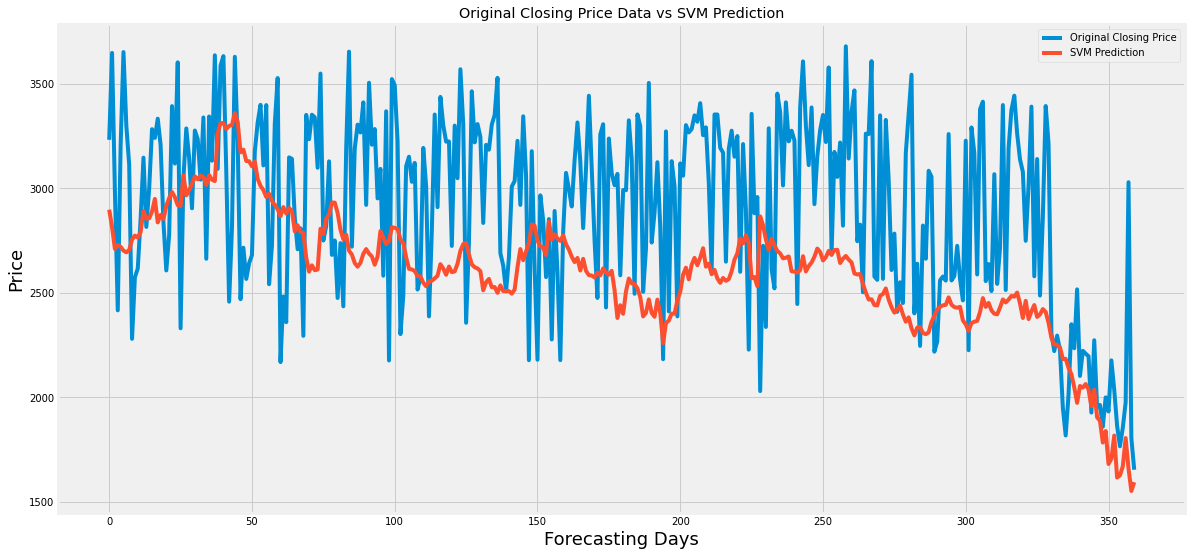

In [28]:
# Original Data vs. SVM Predicted

plt.figure(figsize=(18,9))
plt.title('Original Closing Price Data vs SVM Prediction')

plt.plot(svr_prediction)
plt.plot(x_forecast)
plt.xlabel('Forecasting Days',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.legend(['Original Closing Price', 'SVM Prediction'])
plt.show()

# **This is almost equal to original when LR is used**

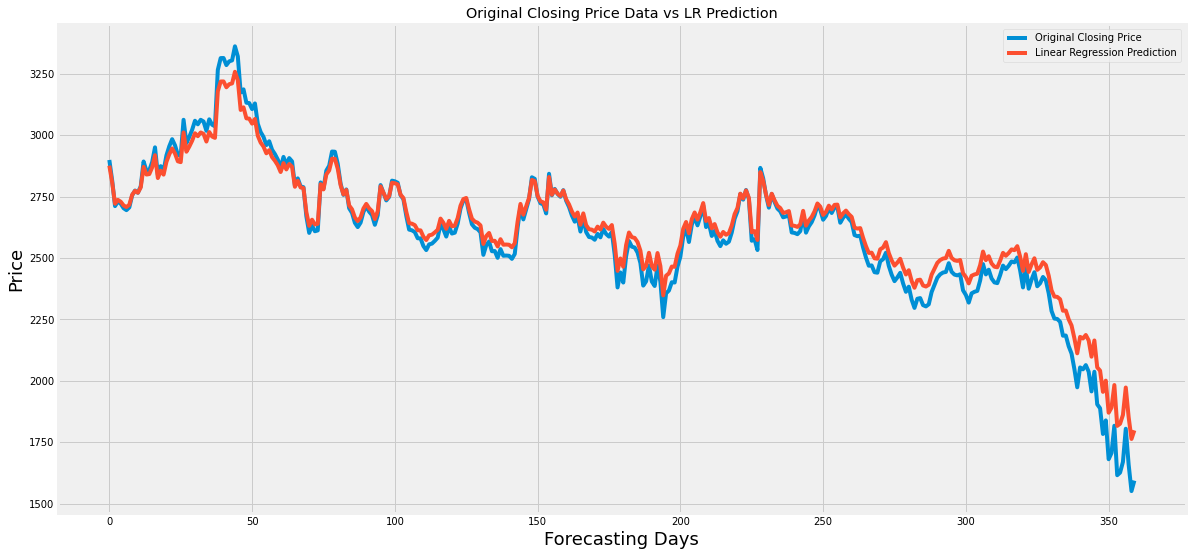

In [29]:
# Original Data vs. Linear Regression Predicted
plt.figure(figsize=(18,9))
plt.title('Original Closing Price Data vs LR Prediction')
plt.plot(x_forecast)
plt.plot(lr_prediction)
plt.xlabel('Forecasting Days',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.legend(['Original Closing Price', 'Linear Regression Prediction'])
plt.show()

***Future scope is using Correlation we could remove outliers and could come up with better model***